In [1300]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Descrição dos dados

- age: idade em anos
- sex: (M = masculino; F = feminino)
- cp: tipo de dor no peito
- trestbps: pressão arterial em repouso (em mm Hg na admissão ao hospital)
- col: colesterol sérico em mg / dl
- fbs: (açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)
- restecg: resultados eletrocardiográficos em repouso
- thalach: frequência cardíaca máxima alcançada
- nar: número de braços
- exang: angina induzida por exercício (1 = sim; 0 = não)
- oldpeak: depressão de ST induzida por exercícios em relação ao repouso
- slope: a inclinação do segmento ST de pico do exercício
- hc: cor do cabelo do paciente
- sk: cor da pele do paciente
- trf: tempo gasto no tráfego diariamente (em segundos)
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível

### Análise dos dados

In [1301]:
dados = pd.read_csv('test_data_CANDIDATE.csv') #lendo o arquivo csv com pandas

In [1302]:
dados.describe(include = 'all') #descrevendo os dados

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
count,288.000000,288.000000,288,288.0,288.000000,272.000000,288.000000,288.000000,288.000000,288.000000,288.000000,145.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,143.500000,54.479167,NaN,10000.0,131.315972,245.139706,0.145833,0.531250,149.611111,0.326389,1.049653,1.393103,0.725694,2.302083,1.972222,0.586806,0.940972,4176.658930
std,83.282651,9.137333,NaN,0.0,17.476938,52.985157,0.353553,0.527035,22.782600,0.469708,1.164935,0.604343,1.024661,0.615476,0.219103,0.651532,1.001735,1988.789872
min,0.000000,29.000000,NaN,10000.0,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,653.415425
25%,71.750000,47.000000,NaN,10000.0,120.000000,208.000000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2671.229092
50%,143.500000,56.000000,NaN,10000.0,130.000000,239.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,2.000000,0.000000,1.000000,4222.567419
75%,215.250000,61.000000,NaN,10000.0,140.000000,273.250000,0.000000,1.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,5885.708843


In [1303]:
dados['sex'] = dados['sex'].str.upper() #padronizando a coluna 'sex' com letras maiusculas

In [1304]:
dados['sex'].value_counts() #contagem da quantidade de pessoas em cada sexo

F    196
M     92
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

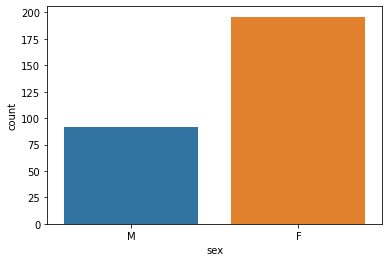

In [1305]:
sns.countplot(x = 'sex',data=dados) #plotagem da quantidade de pessoas em cada sexo

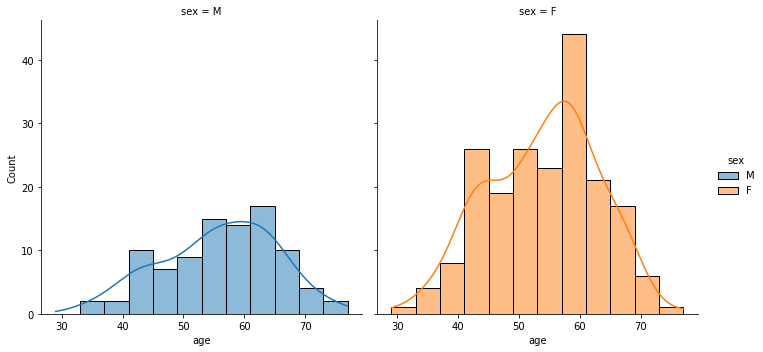

In [1306]:
sns.displot(data=dados['sex'], x=dados['age'], hue=dados['sex'], col=dados['sex'], kde=True)
#plotagem das idades em cada sexo

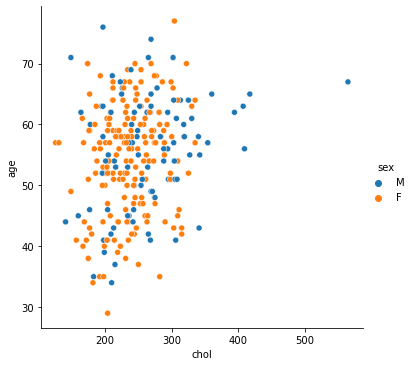

In [1307]:
sns.relplot(x='chol',y='age',hue='sex', data=dados)
#plotagem da relação entre o colesterol, sexo e idade dos pacientes

In [1308]:
dados.columns #verificando as colunas do dataframe

Index(['index', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'nar', 'hc', 'sk',
       'trf'],
      dtype='object')

In [1309]:
dados.corr() #verificando a relação entre as colunas

,index,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
index,1.000000,0.030224,NaN,0.089938,0.001521,0.059404,-0.140705,0.007503,0.089962,-0.025468,-0.017234,0.118551,0.089082,0.018904,-0.091087,0.059912,0.046987
age,0.030224,1.000000,NaN,0.284418,0.227584,0.123899,-0.119609,-0.414447,0.097387,0.207286,-0.222163,0.281664,0.065248,0.037999,0.042152,0.164504,0.076198
cp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,0.089938,0.284418,NaN,1.000000,0.105901,0.193263,-0.100753,-0.081598,0.084592,0.223608,-0.101891,0.107589,0.048754,-0.015898,-0.020930,0.100978,-0.011933
chol,0.001521,0.227584,NaN,0.105901,1.000000,0.025515,-0.139443,-0.004534,0.046309,0.042392,-0.040443,0.077734,0.103270,-0.062075,-0.019729,0.008107,-0.026251
fbs,0.059404,0.123899,NaN,0.193263,0.025515,1.000000,-0.061941,0.004902,0.006120,0.015351,-0.083786,0.149279,-0.043033,-0.037483,-0.100526,0.034228,-0.069979
restecg,-0.140705,-0.119609,NaN,-0.100753,-0.139443,-0.061941,1.000000,0.039900,-0.055421,-0.059004,0.098233,-0.071174,-0.002350,0.007543,0.063102,0.026605,-0.034840
thalach,0.007503,-0.414447,NaN,-0.081598,-0.004534,0.004902,0.039900,1.000000,-0.355377,-0.336999,0.362700,-0.218919,-0.088503,0.054368,-0.059688,0.053495,-0.038972
exang,0.089962,0.097387,NaN,0.084592,0.046309,0.006120,-0.055421,-0.355377,1.000000,0.291216,-0.223481,0.114274,0.200123,0.054547,-0.081517,0.033683,0.080445
oldpeak,-0.025468,0.207286,NaN,0.223608,0.042392,0.015351,-0.059004,-0.336999,0.291216,1.000000,-0.544242,0.208484,0.217130,0.019074,0.039061,0.023421,0.110318


### Teste dos modelos

In [1310]:
#trocando os valores nulos por 0
dados = dados.fillna(0)

In [1311]:
# Carregando dataset nas variaveis X, y
X = dados.drop(columns = ['sex'])
y = dados['sex']

In [1312]:
# Verificando importância de cada feature
X_columns = X.columns
list(zip(X_columns, model.feature_importances_))

[('index', 0.09267852025236298),
 ('age', 0.09066261485435084),
 ('cp', 0.0),
 ('trestbps', 0.08982283293752864),
 ('chol', 0.14867464084377938),
 ('fbs', 0.012137777516425993),
 ('restecg', 0.024396736253748358),
 ('thalach', 0.09437538801276556),
 ('exang', 0.019541318766492143),
 ('oldpeak', 0.0663112527423167),
 ('slope', 0.026424456319164017),
 ('ca', 0.03257019057302864),
 ('thal', 0.08751435732480695),
 ('nar', 0.006918716953636481),
 ('hc', 0.08453453465403074),
 ('sk', 0.030810354958837154),
 ('trf', 0.09262630703672553)]

In [1313]:
#obtendo melhores parametros para random forest
param_grid = {
    "max_depth": [4, 5, 6],
    "max_features": ["auto", "sqrt"],
    "n_estimators": [20, 50, 100]
}
rf = RandomForestClassifier()
rf_gs = GridSearchCV(estimator=cf, param_grid=param_grid, cv=3)
rf_gs.fit(X, y)

rf_gs.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}

In [1314]:
#Treinando modelo com Random Forest
model_rf=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 100, max_depth=5)
model_rf.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=0)

In [1315]:
#Verificandoo sexo de cada paciente com o modelo treinado
model_rf.predict(X)

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'F',
       'F', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'M', 'M',
       'F', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M',
       'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'F',
       'F', 'F', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'F',
       'M', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M',
       'F', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M',
       'F', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F',
       'F', 'F', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'M',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'M',
       'M', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M

In [1316]:
#Verificando a acuracia do modelo random forest
scores_rf = cross_val_score(model_rf, X, y,scoring='accuracy', cv=5)
scores_rf.mean()

0.722323049001815

In [1317]:
#Treinando modelo com Decision Tree
model_dt = DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=3)
model_dt.fit(X, y)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [1318]:
#Verificandoo sexo de cada paciente com o modelo treinado com Decision Tree
model_dt.predict(X)

array(['M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M',
       'F', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'M', 'M',
       'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M',
       'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'F',
       'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M',
       'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'F', 'M',
       'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'M',
       'M', 'F', 'M', 'F', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M',
       'M', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'F', 'F', 'F', 'M',
       'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'F',
       'F', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'M',
       'M', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'M',
       'F', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M

In [1319]:
#Verificando a acuracia do modelo
scores_dt = cross_val_score(model_dt, X, y,scoring='accuracy', cv=5)
scores_dt.mean()


0.7081669691470054